## CASE STUDY 2: COMPARISON WITH NON-INDEPENDENT ALONG-TRACK

__INTRODUCTION__

We here propose to show the behaviour of the spectral analysis in an OSSE case study based on NATL60 simulation.
The input comes from hourly SSH data from a 1 year long period of the run NATL60-CJM165 made at IGE (Grenoble).
We used the SWOTsimulator to sample alongtrack data (nadir-like dataset) on this simulation. The constellation is similar to the 20030101-20031231 period: Jason 1, Envisat, Geosat2, Topex/Poseidon interleaved. SWOTsimulator gives us the true SSH (SSH$_{model}$) and a pseudo-obs SSH (SSH$_{obs}$ = SSH$_{model}$ + white noise). These pseudo-obs SSH$_{obs}$ are then used in the DUACS mapping.

__CASE STUDY #2 SUMMARY:__
- the along-track of reference (i.e., for comparison) is __Jason1__. In this case study #2, this along-track __is included__ in the mapping.
- the SSH$_{map}$ produced are generated from __3 nadir altimeters__ TPN, J1, EN with the DUACS system
- we focus on the region in the north-atlantic bassin __(10°x10° box centered near 330°E-44°N)__

__MATHEMATICAL FORMULATION__

Following the notation and derivation used in Tom's review, we have:

- _alongtrack used in mapping_:

\begin{equation*}
\tilde{x} = x + n
\end{equation*}

, where x is the true SSH and n is the measurement noise

This leads to ssh_map h$_{n}$ as some linear combination of the measurements:
\begin{equation*}
h_{n} = \sum_{m=-\infty}^{\infty} w_{m} \tilde{x}_{n−m},            \hspace{2cm} (1)
\end{equation*}

The weighting function w specifies the particular linear combination, and could represent any linear mapping; the weighting function is assumed to be nonzero over only a finite extent, so the summation indices do not actually extend to infinity. Equation 1 is a convolution operation, which we write as,

\begin{equation*}
h = w ∗ \tilde{x} = w * (x + n), \hspace{2cm} (2)
\end{equation*}

where ∗ is the discrete convolution operator. Fourier transforming both sides and using the
convolution theorem,

\begin{equation*}
\hat{h}(k) = \hat{w}(k)(\hat{x}(k) + \hat{n}(k)), \hspace{2cm} (3)
\end{equation*}

- _independent dataset_:

In the paper, the mapped field is compared to independent data (data withheld from the mapping).

__It is not the case here, where the comparison is made with NON-independent data such as:__

\begin{equation*}
y = x + n_{0}, 
\end{equation*}

where $y$ is the measured SSH and $n_{0}$ is the noise on that independent record. The Fourier transform of the independent SSH record is,

\begin{equation*}
\hat{y}(k) = \hat{x}(k) + \hat{n}_{0}(k)
\end{equation*}

- _spectral metrics_:


1. The magnitude squared coherence between the mapped SSH h and the NON independent SSH record y is,

\begin{equation*}
\gamma^{2} = \frac{⟨ \hat{y} * \hat{h} ⟩^2}{⟨ \hat{y} * \hat{y} ⟩ ⟨ \hat{h} ∗ \hat{h} ⟩}
\end{equation*}

2. The transfer function between the mapped SSH h and the independent SSH record y is

\begin{equation*}
H = \frac{⟨\hat{y}*\hat{h}⟩}{⟨\hat{y}∗\hat{y}⟩} 
\end{equation*}

3. The ratio of the two spectra (between the mapped SSH h and the independent SSH record):
\begin{equation*}
R = \frac{⟨\hat{h}*\hat{h}⟩}{⟨\hat{y}∗\hat{y}⟩} = \frac{\hat{w}^{2} (⟨\hat{x}*\hat{x}⟩ + ⟨\hat{n}*\hat{n}⟩)}{⟨\hat{x}∗\hat{x}⟩ + ⟨\hat{n}_{0}*\hat{n}_{0}⟩}
\end{equation*} 

4. The ratio of the error spectrum / independent SSH spectrum:
\begin{equation*}
Q = \frac{⟨\hat{h}*\hat{h}⟩ - ⟨\hat{y}*\hat{y}⟩}{⟨\hat{y}*\hat{y}⟩}
\end{equation*}

<font color='red'> Note that the ratio PSD(mapping_error)/PSD(SSH$_{model}$) can gives access to the estimation of the map resolution. However, the DUACS maps and along-track products gives us access to only: PSD(SSH$_{map}$), PSD(SSH$_{obs}$) and PSD(intrumental_error). We will have to play with this three latter quantities to estimate the resolution. In the study cases 1 and 2, we shows that the PSD(SSH$_{map}$), PSD(SSH$_{obs}$) and PSD(intrumental_error) can estimate the resolution and that it is in good agreement with the ratio PSD(mapping_error)/PSD(SSH$_{model}$).</font>

PYTHON MODULE

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate
from matplotlib.ticker import FormatStrFormatter

__READ THE SSH SEGMENTS__

_Note_: The SSH segments were generated using same algorithm as used for the study described in the manuscript. There are 800km long, referenced by their mean latitude and mean longitude and they overlap over 25%

__NOTATION__

- __SSH$_{model}$__: alongtrack SSH from model
- __SSH$_{obs}$__: alongtrack SSH from model including white noise
- __SSH$_{map}$__: SSH mapped with the DUACS algorithm using 3 altimeters data, and interpolated onto the alongtrack SSH$_{model}$ path
- __intrumental_error__: SSH$_{obs}$ minus SSH$_{model}$
- __map_error__: SSH$_{model}$ minus SSH$_{map}$

In [2]:
nc = Dataset('./data/dataset_NON_independent_alongtrack_J1.nc','r')
ssh_model = nc.variables['ssh_model'][:]
ssh_obs = nc.variables['ssh_obs'][:]
ssh_map = nc.variables['ssh_map'][:]
dx = nc.variables['resolution'][:]
nperseg = nc.dimensions['segment_size'].size
nc.close()

__COMPUTE INSTRUMENTAL ERROR & MAPPING ERROR__

In [3]:
intrumental_error = ssh_obs - ssh_model
mapping_error = ssh_model - ssh_map

__QUANTITY THAT CAN BE EVALUATED FROM ALTIMETRY DATA__ : SSH$_{map}$ - SSH$_{obs}$

In [4]:
# What can evaluated from altimetry product (we don't have access to ssh_model)
psd_ssh_obs_minus_map = ssh_obs - ssh_map

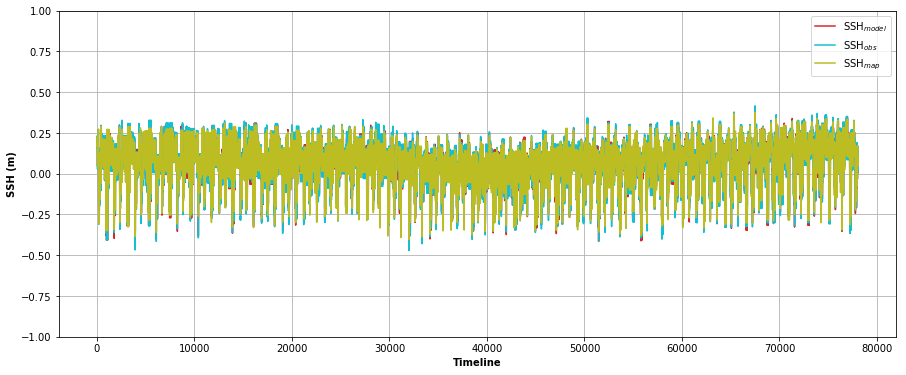

In [5]:
plt.figure(figsize=(15, 6))
plt.xlabel("Timeline", fontweight='bold')
plt.ylabel("SSH (m)", fontweight='bold')
plt.plot(ssh_model, c='C3', label='SSH$_{model}$')
plt.plot(ssh_obs, c='C9', label='SSH$_{obs}$')
plt.plot(ssh_map, c='C8', label='SSH$_{map}$')
plt.ylim(-1, 1)
plt.legend(loc='best')
plt.grid()
plt.show()

__SPECTRAL CONTENT OF EACH SIGNAL__

In [6]:
freq, psd_ssh_model = signal.welch(ssh_model, 
                                   fs=1/dx, 
                                   nperseg=nperseg, 
                                   scaling='density', 
                                   noverlap=0)

_, psd_ssh_obs = signal.welch(ssh_obs, 
                              fs=1/dx, 
                              nperseg=nperseg, 
                              scaling='density', 
                              noverlap=0)

_, psd_ssh_map = signal.welch(ssh_map, 
                              fs=1/dx, 
                              nperseg=nperseg, 
                              scaling='density', 
                              noverlap=0)

_, psd_intrumental_error = signal.welch(intrumental_error, 
                                        fs=1/dx, 
                                        nperseg=nperseg, 
                                        scaling='density', 
                                        noverlap=0)

_, psd_mapping_error = signal.welch(mapping_error, 
                                    fs=1/dx, 
                                    nperseg=nperseg, 
                                    scaling='density', 
                                    noverlap=0)

_, psd_ssh_obs_minus_map = signal.welch(psd_ssh_obs_minus_map, 
                                         fs=1/dx, 
                                         nperseg=nperseg, 
                                         scaling='density', 
                                         noverlap=0)

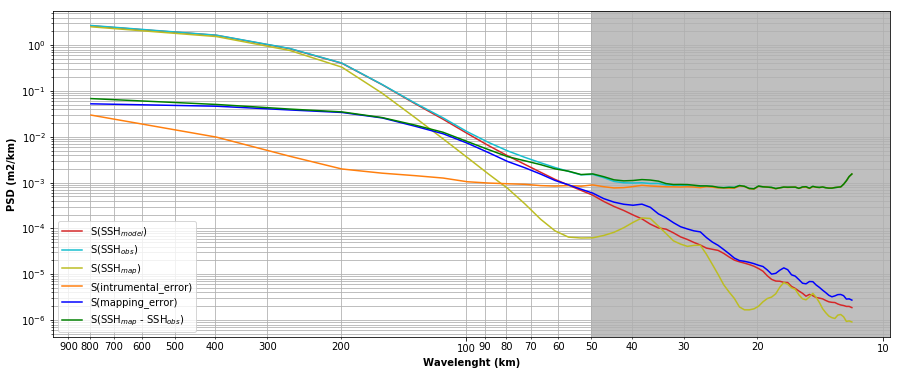

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(1/freq, psd_ssh_model, c='C3', label='S(SSH$_{model}$)')
plt.plot(1/freq, psd_ssh_obs, c='C9', label='S(SSH$_{obs}$)')
plt.plot(1/freq, psd_ssh_map, c='C8', label='S(SSH$_{map}$)')
plt.plot(1./freq, psd_intrumental_error, c='C1', label='S(intrumental_error)')
plt.plot(1./freq, psd_mapping_error, c='b', label='S(mapping_error)')
plt.plot(1./freq, psd_ssh_obs_minus_map, c='g', label='S(SSH$_{map}$ - SSH$_{obs}$)')
ax.axvspan(0, 50, color='grey', alpha=0.5)
plt.gca().invert_xaxis()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Wavelenght (km)', fontweight='bold')
plt.ylabel('PSD (m2/km)', fontweight='bold')
plt.legend(loc='best')
plt.grid(which='both')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.xaxis.set_minor_formatter(FormatStrFormatter('%.f'))
plt.show()

The figure represents the power spectral densities from each type of signal. 
It illustrates a good agreement of the power spectral density S(SSH$_{obs}$), S(SSH$_{map}$) and S(SSH$_{model}$) for wavelength > 200-300 km.
For wavelength < 200 km the power spectral density of the SSH$_{map}$ is less energetic than for the SSH$_{obs}$, linked to the filtering properties of te DUACS mapping system. 

The signal-noise-ratio for the input along-track is between 50-60km (crossing of the red and orange lines), setting the along-track resolution limit as defined in Dufau et al (2016).

For wavelenght greater than this along-track resolution limit, the power spectral density of the mapping error S(mapping_error) is larger than the power spectral density of the instrumental error S(instrumental_error).

The power spectral density S(SSH$_{map}$) for wavelenght smaller than this along-track resolution limit (approx. grey area) is below the grid spacing of the DUACS maps. The power spectral density S(SSH$_{map}$) below this limit is hence resulting from the interpolation of the SSH$_{map}$ onto the reference alongtrack position

__CROSS SPECTRUM__

In [8]:
freq, cross_psd_ssh_map_ssh_obs = signal.csd(ssh_map, 
                                             ssh_obs, 
                                             fs=1./dx, 
                                             nperseg=nperseg, 
                                             noverlap=0)

__SPECTRAL COHERENCE__

In [9]:
# Compute coherence ssh_map ssh_obs
freq, coh_ssh_map_ssh_obs = signal.coherence(ssh_map, 
                                          ssh_obs, 
                                          fs=1/dx, 
                                          nperseg=nperseg, 
                                          noverlap=0)

# Compute coherence ssh_map ssh_model
_, coh_ssh_map_ssh_model = signal.coherence(ssh_map, 
                                            ssh_model, 
                                            fs=1/dx, 
                                            nperseg=nperseg, 
                                            noverlap=0)

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


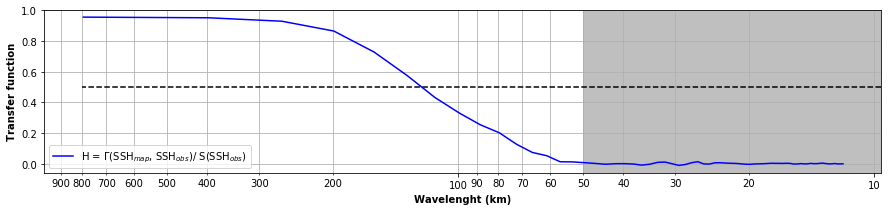

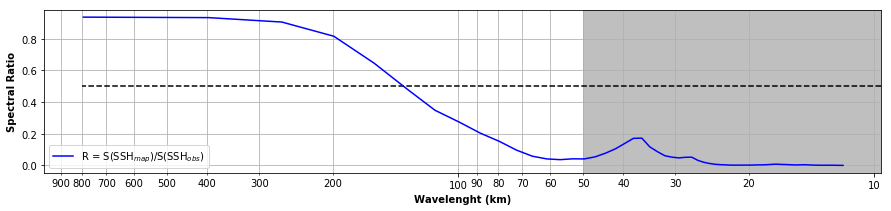

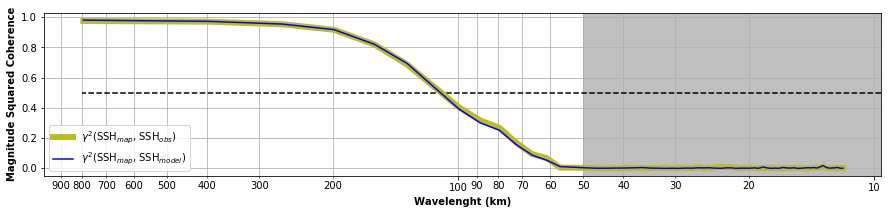

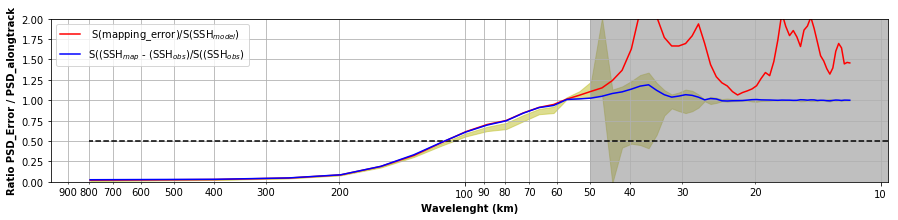

In [10]:

# TRANSFER FUNCTION
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(1./freq, cross_psd_ssh_map_ssh_obs/psd_ssh_obs, 
         c='b', label='H = $\Gamma$(SSH$_{map}$, SSH$_{obs}$)/ S(SSH$_{obs}$)')
plt.xscale('log')
plt.gca().invert_xaxis()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.xaxis.set_minor_formatter(FormatStrFormatter('%.f'))
plt.xlabel('Wavelenght (km)', fontweight='bold')
plt.ylabel('Transfer function', fontweight='bold')
plt.hlines(0.5, xmin=0, xmax=800, linestyle='--')
plt.legend()
ax.axvspan(0, 50, color='grey', alpha=0.5)
plt.grid(which='both')

# SPECTRAL RATIO
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(1./freq, psd_ssh_map/psd_ssh_obs, c='b', 
         label='R = S(SSH$_{map}$)/S(SSH$_{obs}$)')
plt.xscale('log')
plt.gca().invert_xaxis()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.xaxis.set_minor_formatter(FormatStrFormatter('%.f'))
plt.xlabel('Wavelenght (km)', fontweight='bold')
plt.ylabel('Spectral Ratio', fontweight='bold')
plt.hlines(0.5, xmin=0, xmax=800, linestyle='--')
plt.legend()
ax.axvspan(0, 50, color='grey', alpha=0.5)
plt.grid(which='both')

# MAGNITUDE SQUARED COHERENCE
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(1./freq, coh_ssh_map_ssh_obs, c='C8', 
         label='$\gamma^2$(SSH$_{map}$, SSH$_{obs}$)', lw=6)
plt.plot(1./freq, coh_ssh_map_ssh_model, c='b', 
         label='$\gamma^2$(SSH$_{map}$, SSH$_{model}$)')
plt.hlines(0.5, xmin=0, xmax=800, linestyle='--')
plt.gca().invert_xaxis()
plt.grid(which='both')
plt.legend()
plt.xscale('log')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.xaxis.set_minor_formatter(FormatStrFormatter('%.f'))
ax.axvspan(0, 50, color='grey', alpha=0.5)
plt.xlabel('Wavelenght (km)', fontweight='bold')
plt.ylabel('Magnitude Squared Coherence', fontweight='bold')

# RATIO ERROR SPECTRUM / (SSH_OBS SPECTRUM)
fig, ax = plt.subplots(figsize=(15, 3))
plt.hlines(0.5, xmin=0, xmax=800, linestyle='--')
plt.plot(1./freq, (psd_mapping_error)/psd_ssh_model, c='r', 
        label=' S(mapping_error)/S(SSH$_{model}$)')
plt.plot(1./freq, (psd_ssh_obs_minus_map)/(psd_ssh_obs), c='b', 
         label='S((SSH$_{map}$ - (SSH$_{obs}$)/S((SSH$_{obs}$)')
#plt.plot(1./freq, (psd_ssh_obs_minus_map - psd_intrumental_error)/
#         (psd_ssh_obs - psd_intrumental_error), c='C8', 
#         label='(S(SSH$_{map}$ - SSH$_{obs}$) - S(intrumental_error))/(S(SSH$_{obs}$) - S(intrumental_error))')

percent = 0.5

#percent = 0.5
upper_bound = np.maximum((psd_ssh_obs_minus_map - 
                          (1 - percent)*psd_intrumental_error)/
                (psd_ssh_obs - (1 - percent)*psd_intrumental_error), 
                         (psd_ssh_obs_minus_map - 
                          (1 + percent)*psd_intrumental_error)/
                (psd_ssh_obs - (1 + percent)*psd_intrumental_error))
lower_bound = np.minimum((psd_ssh_obs_minus_map - 
                          (1 - percent)*psd_intrumental_error)/
                (psd_ssh_obs - (1 - percent)*psd_intrumental_error), 
                         (psd_ssh_obs_minus_map - 
                          (1 + percent)*psd_intrumental_error)/
                (psd_ssh_obs - (1 + percent)*psd_intrumental_error))

ax.fill_between(1./freq, lower_bound, upper_bound, color='C8', alpha=0.5)
plt.ylim(0,2)
plt.gca().invert_xaxis()
plt.grid(which='both')
plt.legend()
plt.xscale('log')
ax.axvspan(0, 50, color='grey', alpha=0.5)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.xaxis.set_minor_formatter(FormatStrFormatter('%.f'))
plt.xlabel('Wavelenght (km)', fontweight='bold')
plt.ylabel('Ratio PSD_Error / PSD_alongtrack', fontweight='bold')
plt.show()

This figure represents various metrics to estimate the resolution the map products: the transfer function, the spectral ratio between SSH$_{map}$ and SSH$_{obs}$, the Magnitude Squared Coherence and the ratio PSD error / PSD SSH$_{obs}$. The threshold $\gamma^2$ = 0.5 and Q = 0.5 gives relatively similar resolution limit for the maps.

The yellow envelop in lower panel gives the spread of the ratio (S(SSH$_{map}$ - SSH$_{obs}$) - $\alpha$.S(intrumental_error))/(S(SSH$_{obs}$) - $\alpha$.S(intrumental_error)) for $\alpha$ = $\pm$ 50% increased/decreased instrumental error level. It shows the sensitivity of the ratio to the noise level in the reference along-track dataset. For wavelenght > 50 km, the ratio is weakly impacted by the amount of nosie level, and the three curve are rather similar.